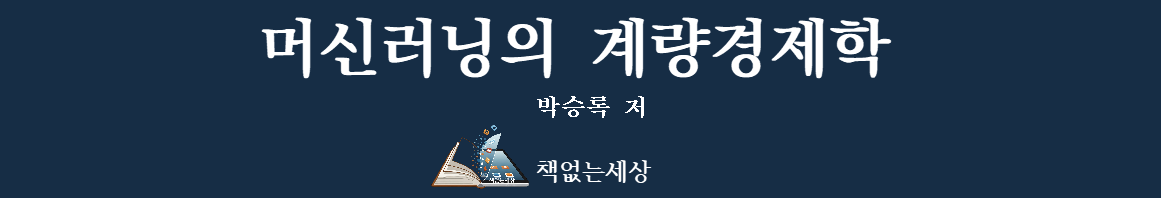

# Part 3: 전통적 계량경제학

## Chapter 2. 고전적 최소자승법

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("X:\Econometrics_with_ML")
os.getcwd()

'X:\\Econometrics_with_ML'

In [2]:
# exec(open('X:/Econometrics_with_ML/Functions/Traditional_Econometrics_Lib.py').read())

In [3]:
# #####################################################################
# 위의 함수는 아래 다양한 라이브러리와 함수를 한 문장으로 불러오는 방법
# #####################################################################

# 분석에 사용될 라이브러리(Libraries for the Analysis) 불러오기
# Libraries for the Analysis of Traditional Econometrics.py
# 불러오는 방법:  "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# #####################################################################

# 만약 특정 라이브러리가 설치되지 않았다는 에러 메시지가 나타날 때는 
# 해당 라이브러리를 설치하여야 함
# 아래 라이브러리를 하나 하나 실행하면서 어떤 라이브러리가 설치되지 않았는지 확인하여도 됨

In [4]:
# #####################################################################
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer.stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random

from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model

import wooldridge as woo
#from imfpy.retrievals import dots
#import wbdata
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")


## 4. 단순회귀분석 실습
### 가. 수식에 의한 단순회귀의 이해

In [5]:
# ############################
# 단순회귀모형 전반의 이해 ###
# ############################
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import wooldridge as woo

vote1 = woo.dataWoo('vote1')

# 수식을 이용한 회귀모형 추정
x = vote1['shareA']
y = vote1['voteA']

# x,y의 상관계수
cov_xy = np.cov(x, y)[1, 0]
# x분산
var_x = np.var(x, ddof=1)
# x, y의 평균
x_bar = np.mean(x)
y_bar = np.mean(y)

# 회귀모형 추정(1): ''사용
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print('\n')
print('모형의 추정결과')
print('파라미터 추정치(기울기):', b1)
print('파라미터 추정치(절편)  :', b0)
print('\n')

# 회귀모형 추정(2): f''사용
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print('\n')
print(f'모형의 추정결과')
print(f'파라미터 추정치(기울기): {b1}')
print(f'파라미터 추정치(절편)  : {b0}')
print(f'\n')



모형의 추정결과
파라미터 추정치(기울기): 0.46382691229088535
파라미터 추정치(절편)  : 26.81221412868039




모형의 추정결과
파라미터 추정치(기울기): 0.46382691229088535
파라미터 추정치(절편)  : 26.81221412868039




### 나. 회귀분석 명령어를 이용한 단순회귀분석

In [6]:
# statsmodels.formula library를 이용한 회귀모형 추정법
reg = smf.ols(formula='y ~ x', data=vote1)
results =reg.fit()

# 정해진 양식 전부 출력
#print(results.summary())
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           6.63e-74
Time:                        16:53:30   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122      0.887     30.221      0.000      25.061      28.564
x              0.4638      0.015     31.901      0.000       0.435       0.493
==============================================================================
Omnibus:                       20.747   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.613
Skew:                           0.525   Prob(JB):                     2.05e-10
Kurtosis:                       5.255   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# 정해진 양식 일부 출력
print(results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122      0.887     30.221      0.000      25.061      28.564
x              0.4638      0.015     31.901      0.000       0.435       0.493


In [8]:
# Pandas의 Data Frame만들어서 추정결과 출력하기
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
#print(f'table: \n{table}\n')
display(table)

,b,se,t,pval
Intercept,26.8122,0.8872,30.2207,0.0
x,0.4638,0.0145,31.9008,0.0


In [9]:
# 원하는 지표만 선별적 출력
b = results.params
voteA_fitted = results.fittedvalues
residuals = results.resid

print('\n')
print('파라미터 추정치:', b)
print('\n')
print('회귀선 추정치:', voteA_fitted)
print('\n')
print('잔차:', residuals)



파라미터 추정치: Intercept    26.812214
x             0.463827
dtype: float64


회귀선 추정치: 0      71.992513
1      55.050478
2      71.810272
3      69.671538
4      60.491833
         ...    
168    34.875018
169    29.556409
170    33.017371
171    41.195523
172    29.573416
Length: 173, dtype: float64


잔차: 0      -3.992513
1       6.949522
2       1.189728
3      -0.671538
4      14.508167
         ...    
168     4.124982
169     2.443591
170     2.982629
171    -3.195523
172     0.426584
Length: 173, dtype: float64


In [10]:
# Pandas의 Data Frame만들어서 출력하기
summary_table = pd.DataFrame({'shareA': vote1['shareA'],
                      'voteA': vote1['voteA'],
                      'voteA_fitted': voteA_fitted,
                      'residuals': residuals})
#print(summary_table)
display(summary_table)

,shareA,voteA,voteA_fitted,residuals
0,97.407669,68,71.992513,-3.992513
1,60.881039,62,55.050478,6.949522
2,97.014763,73,71.810272,1.189728
3,92.403702,69,69.671538,-0.671538
4,72.612473,75,60.491833,14.508167
...,...,...,...,...
168,17.383217,39,34.875018,4.124982
169,5.916420,32,29.556409,2.443591
170,13.378174,36,33.017371,2.982629
171,31.010078,38,41.195523,-3.195523


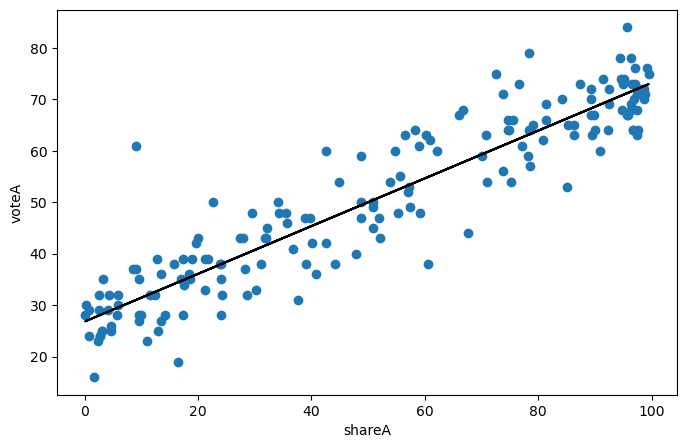

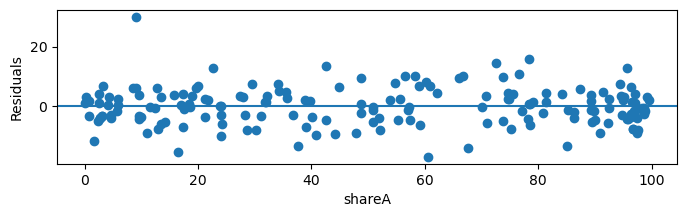

In [11]:
# 실제 데이터 값과 회귀추정식에 의한 Fitted된 값 그래프로 그리기
plt.figure(figsize =(8, 5))
plt.scatter('shareA', 'voteA', data=vote1)
plt.plot(vote1['shareA'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('voteA')
plt.xlabel('shareA')

# 잔차의 도표 그리기 
plt.figure(figsize =(8, 2))
plt.scatter('shareA', 'residuals', data=summary_table)
plt.ylabel('Residuals')
plt.xlabel('shareA')
plt.axhline(y=0, linestyle='-')

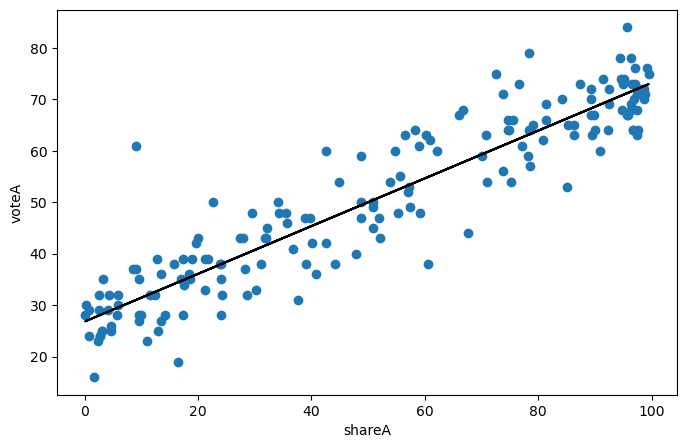

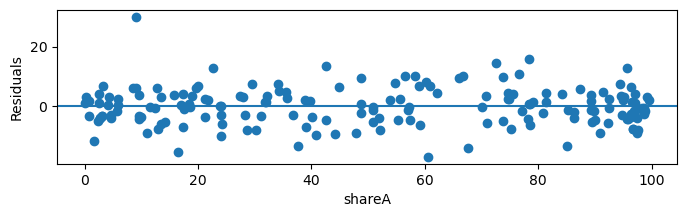

In [12]:
# 실제 데이터 값과 회귀추정식에 의한 Fitted된 값 그래프로 그리기
plt.figure(figsize =(8, 5))
plt.scatter('shareA', 'voteA', data=summary_table)
plt.plot('shareA', 'voteA_fitted', color='black', linestyle='-', data=summary_table)
plt.ylabel('voteA')
plt.xlabel('shareA')

# 잔차의 도표 그리기 
plt.figure(figsize =(8, 2))
plt.scatter('shareA', 'residuals', data=summary_table)
plt.ylabel('Residuals')
plt.xlabel('shareA')
plt.axhline(y=0, linestyle='-')

### 다. 단순회귀분석에서 기본 가정 확인

In [13]:
# 추정결과로 부터 OLS기본 가정 체크하기
# 잔차항의 평균은 0? (1):
residuals_mean = np.mean(residuals)
print(residuals_mean)

# 독립변수와 잔차의 상관관계는 0? (2):
shareA_res_cov = np.cov(vote1['shareA'], residuals)[1, 0]
print(shareA_res_cov)

# 회귀선은 표본의 평균을 통과? (3):
shareA_mean = np.mean(vote1['shareA'])
voteA_fit = b[0] + b[1] * shareA_mean
print(voteA_fit)
voteA_mean = np.mean(vote1['voteA'])
print(voteA_mean)

-1.4457285721824003e-14
-7.539579868117936e-14
50.50289017341042
50.50289017341041


### 라. 결정 계수의 의미 

In [14]:
# R-square 의미이해
# R^2는 3가지 방법으로 구할 수 있음
voteA = vote1['voteA']
R2_a = np.var(results.fittedvalues, ddof=1) / np.var(voteA, ddof=1)
R2_b = 1 - np.var(residuals, ddof=1) / np.var(voteA, ddof=1)
R2_c = np.corrcoef(voteA, results.fittedvalues)[1, 0] ** 2

print(f'R2_a: {R2_a}\n')
print(f'R2_b: {R2_b}\n')
print(f'R2_c: {R2_c}\n')

R2_a: 0.8561408655827668

R2_b: 0.8561408655827665

R2_c: 0.8561408655827673



## 5. 다중회귀모형 실습
### 가. 행렬 연산에 의한 다중회귀모형의 추정

In [15]:
# ########################################
# 행렬연산에 의한 다중회귀 모형 추정치 ###
# ########################################

import wooldridge as woo
import numpy as np
import pandas as pd
import patsy as pt

gpa1 = woo.dataWoo('gpa1')

# 샘플 사이즈와 독립변수의 수
n = len(gpa1)
k = 2

# 종속변수(y)
y = gpa1['colGPA']

# 독립변수 행렬 X에 포함될 변수와 상수항 
X = pd.DataFrame({'const': 1, 'hsGPA': gpa1['hsGPA'], 'ACT': gpa1['ACT']})
print(y, X)

# patsty 모듈을 이용한 종속변수, 독립변수 행렬 만들기(편리한 행렬만들기 방법) 
y2, X2 = pt.dmatrices('colGPA ~ hsGPA + ACT', data=gpa1, return_type='dataframe')
print(y2, X2)

# 다중회귀 파라미터 추정: 행렬을 배열(array)로 만듬
X = np.array(X)
y = np.array(y)
print(y, X)

# 행렬연산은 배열(array)을 이용함
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# 잔차, 잔차의 분산, 표준오차 구하기 
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
ser = np.sqrt(sigsq_hat)
print(f'SER: {ser}\n')

# 파라미터 추정치의 분산과 표준오차 구하기 
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

0      3.0
1      3.4
2      3.0
3      3.5
4      3.6
      ... 
136    3.0
137    2.3
138    2.8
139    3.4
140    2.8
Name: colGPA, Length: 141, dtype: float64      const  hsGPA  ACT
0        1    3.0   21
1        1    3.2   24
2        1    3.6   26
3        1    3.5   27
4        1    3.9   28
..     ...    ...  ...
136      1    3.3   23
137      1    3.6   25
138      1    3.4   21
139      1    3.7   26
140      1    3.3   28

[141 rows x 3 columns]
     colGPA
0       3.0
1       3.4
2       3.0
3       3.5
4       3.6
..      ...
136     3.0
137     2.3
138     2.8
139     3.4
140     2.8

[141 rows x 1 columns]      Intercept  hsGPA   ACT
0          1.0    3.0  21.0
1          1.0    3.2  24.0
2          1.0    3.6  26.0
3          1.0    3.5  27.0
4          1.0    3.9  28.0
..         ...    ...   ...
136        1.0    3.3  23.0
137        1.0    3.6  25.0
138        1.0    3.4  21.0
139        1.0    3.7  26.0
140        1.0    3.3  28.0

[141 rows x 3 columns]
[3.      

### 나. 함수식을 이용한 다중회귀모형 추정

In [16]:
import wooldridge as woo
import statsmodels.formula.api as smf
import numpy as np

# 대학성적 결정요인(대학성적=F(고등학교 성적, 성과측정 점수))
gpa1 = woo.dataWoo('gpa1')

reg = smf.ols(formula='colGPA ~ hsGPA + ACT', data=gpa1)
results = reg.fit()
display(results.summary())

# 이상은 다음과 같은 2줄 또는 1줄 명령어로 대체 가능함
reg = smf.ols(formula='colGPA ~ hsGPA + ACT', data=gpa1).fit().summary()
display(reg)

display(smf.ols(formula='colGPA ~ hsGPA + ACT', data=gpa1).fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           1.53e-06
Time:                        16:53:31   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2863      0.341      3.774      0.000       0.612       1.960
hsGPA          0.4535      0.096      4.733      0.000       0.264       0.643
ACT            0.0094      0.011      0.875      0.383      -0.012       0.031
==============================================================================
Omnibus:                        3.056   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.469
Skew:                           0.199   Prob(JB):                        0.291
Kurtosis:                       2.488   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           1.53e-06
Time:                        16:53:31   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2863      0.341      3.774      0.000       0.612       1.960
hsGPA          0.4535      0.096      4.733      0.000       0.264       0.643
ACT            0.0094      0.011      0.875      0.383      -0.012       0.031
==============================================================================
Omnibus:                        3.056   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.469
Skew:                           0.199   Prob(JB):                        0.291
Kurtosis:                       2.488   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           1.53e-06
Time:                        16:53:31   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2863      0.341      3.774      0.000       0.612       1.960
hsGPA          0.4535      0.096      4.733      0.000       0.264       0.643
ACT            0.0094      0.011      0.875      0.383      -0.012       0.031
==============================================================================
Omnibus:                        3.056   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.469
Skew:                           0.199   Prob(JB):                        0.291
Kurtosis:                       2.488   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 다. 다중공선성과 분산 팽창요인(VIF)

#### 1) 수식을 이용한 VIF 계산 

In [17]:
# ##############################
# 표준오차, 다중공선성과 VIF ###
# ##############################

import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf

gpa1 = woo.dataWoo('gpa1')

# 전체 모형 추정
reg = smf.ols(formula='colGPA ~ hsGPA + ACT', data=gpa1)
results = reg.fit()
print(results.summary().tables[1])

# 함수를 이용한 SER계산
ser = np.sqrt(results.mse_resid)

# hsGPA를 ACT 에 대해 회귀분석, R2와 VIF계산
reg2 = smf.ols(formula='hsGPA ~ ACT', data=gpa1)
results2 = reg2.fit()
R2 = results2.rsquared
VIF = 1 / (1 - R2)
print(f'\n VIF: {VIF}\n')


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2863      0.341      3.774      0.000       0.612       1.960
hsGPA          0.4535      0.096      4.733      0.000       0.264       0.643
ACT            0.0094      0.011      0.875      0.383      -0.012       0.031

 VIF: 1.1358234481972789



#### 2) 함수를 이용한 VIF 

In [18]:
# 여러 독립변수들에 대한 VIF 계산(10이상이면 다중공선성 문제 존재)
import wooldridge as woo
import numpy as np
import statsmodels.stats.outliers_influence as smo
import patsy as pt

wage1 = woo.dataWoo('gpa1')

# 행렬 정의
y, X = pt.dmatrices('colGPA ~ hsGPA + ACT + skipped', data=gpa1, return_type='dataframe')

# VIF계산
K = X.shape[1]
VIF = np.empty(K)
for i in range(K):
    VIF[i] = smo.variance_inflation_factor(X.values, i)
    
print(f'VIF: \n{VIF}\n')


VIF: 
[142.77409438   1.15821703   1.16443552   1.03349919]



### 라. statsmodels에서 회귀모형 추정을 위한 코딩 방법

In [19]:
# 참고: 알아 두어야 할 OLS추정법
# 1) OLS추정식을 이용한 추정법(평균, 분산,공분산 이용 )
# 2) statsmodel.formula module을 이용한 추정법
#     예)import statsmodels.api as smf 
#        smf.ols(formula='y ~ x', data=vote1)
# 3) statsmodel.api module을 이용한 추정법
#    예)  import statsmodels.api as sm
#         y = vote1['voteA']
#         X = vote1['shareA']
#         X = sm.add_constant(X)
#         sm.OLS(y, X).fit()
# 4) patsy module 사용하는 방법(다중회귀에서 설명)
# 5) 행렬연산을 이용하는 방법(다중회귀에서 설명)

### 마. 상수항, 기울기 없는 모형의 추정

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           2.78e-22
Time:                        16:53:31   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.1

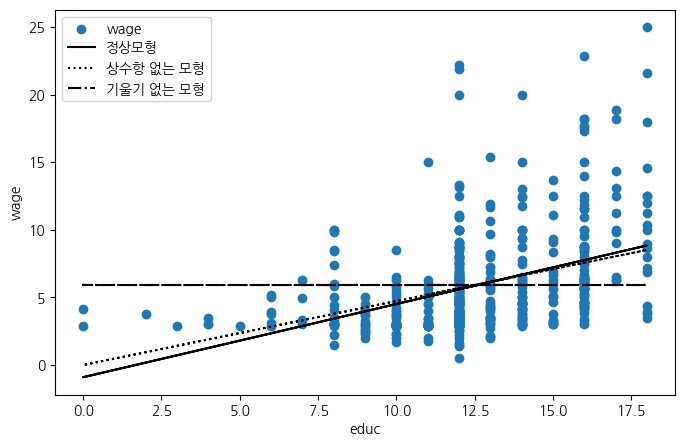

In [20]:
# ###########################################
# 상수항없는 모형, 기울기 없는 모형 추정) ###
# ###########################################
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import wooldridge as woo

# 한글폰트 사용하기 위한 모듈
import matplotlib as mpl
# 폰트 설정
mpl.rc('font', family='NanumGothic') 
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus=False) 

wage1 = woo.dataWoo('wage1')

# 선형 회귀모형
reg = smf.ols(formula='wage ~ educ', data=wage1)
results_1 =reg.fit()
print(results_1.summary())

# 상수항없는 회귀모형
reg = smf.ols(formula='wage ~ 0 + educ', data=wage1)
results_2 =reg.fit()
print(results_2.summary())

# 기울기 없는 회귀모형
reg = smf.ols(formula='wage ~ 1', data=wage1)
results_3 =reg.fit()
print(results_3.summary())

plt.figure(figsize =(8, 5))
# scatter plot and fitted values:
plt.scatter('educ', 'wage', data=wage1)
plt.plot(wage1['educ'], results_1.fittedvalues, color='black',
         linestyle='-', label='정상모형')
plt.plot(wage1['educ'], results_2.fittedvalues, color='black',
         linestyle=':', label='상수항 없는 모형')
plt.plot(wage1['educ'], results_3.fittedvalues, color='black',
         linestyle='-.', label='기울기 없는 모형')
plt.ylabel('wage')
plt.xlabel('educ')
plt.legend()
plt.savefig('Figures/Part 3_Simple Regression_plot2.png')

In [21]:
# ####################################
# 비선형 모형(증가율, 탄력성 추정) ###
# ####################################
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import wooldridge as woo

wage1 = woo.dataWoo('wage1')

# 선형 회귀모형
reg = smf.ols(formula='wage ~ educ', data=wage1)
results =reg.fit()

print(results.summary().tables[1])
display(results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.187      -2.250       0.441
educ           0.5414      0.053     10.167      0.000       0.437       0.646


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.9049,0.685,-1.321,0.187,-2.250,0.441
educ,0.5414,0.053,10.167,0.000,0.437,0.646


In [22]:
wage1['wage_fitted'] = results.fittedvalues
wage1['residuals'] = results.resid

print(wage1.describe().T)

             count          mean         std       min        25%         50%  \
wage         526.0  5.896103e+00    3.693086  0.530000   3.330000    4.650000   
educ         526.0  1.256274e+01    2.769022  0.000000  12.000000   12.000000   
exper        526.0  1.701711e+01   13.572160  1.000000   5.000000   13.500000   
tenure       526.0  5.104563e+00    7.224462  0.000000   0.000000    2.000000   
nonwhite     526.0  1.026616e-01    0.303805  0.000000   0.000000    0.000000   
female       526.0  4.790875e-01    0.500038  0.000000   0.000000    0.000000   
married      526.0  6.083650e-01    0.488580  0.000000   0.000000    1.000000   
numdep       526.0  1.043726e+00    1.261891  0.000000   0.000000    1.000000   
smsa         526.0  7.224335e-01    0.448225  0.000000   0.000000    1.000000   
northcen     526.0  2.509506e-01    0.433973  0.000000   0.000000    0.000000   
south        526.0  3.555133e-01    0.479124  0.000000   0.000000    0.000000   
west         526.0  1.692015

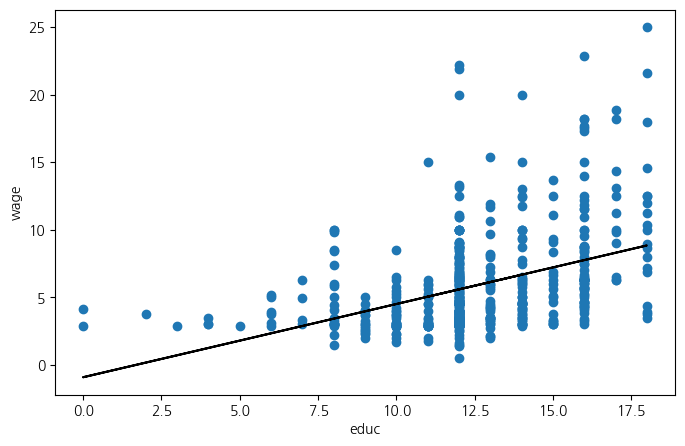

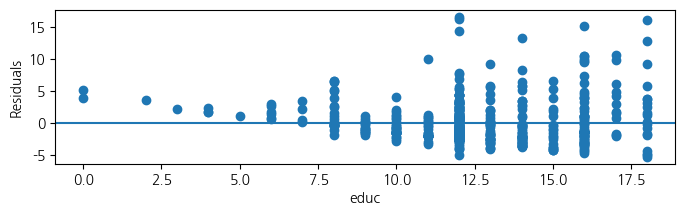

In [23]:
# 실제 데이터 값과 회귀추정식에 의한 Fitted된 값 그래프로 그리기
plt.figure(figsize =(8, 5))
plt.scatter('educ', 'wage', data=wage1)
plt.plot('educ', 'wage_fitted', data=wage1, color='black', linestyle='-')
plt.ylabel('wage')
plt.xlabel('educ')

# 잔차의 도표 그리기 
plt.figure(figsize =(8, 2))
plt.scatter('educ', 'residuals', data=wage1)
plt.ylabel('Residuals')
plt.xlabel('educ')
plt.axhline(y=0, linestyle='-')

In [24]:
# 증가율 추정 회귀모형
wage1 = woo.dataWoo('wage1')
wage1['Lwage'] = np.log(wage1['wage'])

reg = smf.ols(formula='Lwage ~ educ', data=wage1)
results =reg.fit()

print(results.summary().tables[1])
display(results.summary())

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Lwage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           3.27e-25
Time:                        16:53:31   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098
==============================================================================
Omnibus:                       11.804   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.811
Skew:                           0.268   Prob(JB):                      0.00100
Kurtosis:                       3.586   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
wage1['Lwage_fitted'] = results.fittedvalues
wage1['residuals'] = results.resid

print(wage1.describe().T)

              count          mean         std       min        25%  \
wage          526.0  5.896103e+00    3.693086  0.530000   3.330000   
educ          526.0  1.256274e+01    2.769022  0.000000  12.000000   
exper         526.0  1.701711e+01   13.572160  1.000000   5.000000   
tenure        526.0  5.104563e+00    7.224462  0.000000   0.000000   
nonwhite      526.0  1.026616e-01    0.303805  0.000000   0.000000   
female        526.0  4.790875e-01    0.500038  0.000000   0.000000   
married       526.0  6.083650e-01    0.488580  0.000000   0.000000   
numdep        526.0  1.043726e+00    1.261891  0.000000   0.000000   
smsa          526.0  7.224335e-01    0.448225  0.000000   0.000000   
northcen      526.0  2.509506e-01    0.433973  0.000000   0.000000   
south         526.0  3.555133e-01    0.479124  0.000000   0.000000   
west          526.0  1.692015e-01    0.375287  0.000000   0.000000   
construc      526.0  4.562738e-02    0.208874  0.000000   0.000000   
ndurman       526.0 

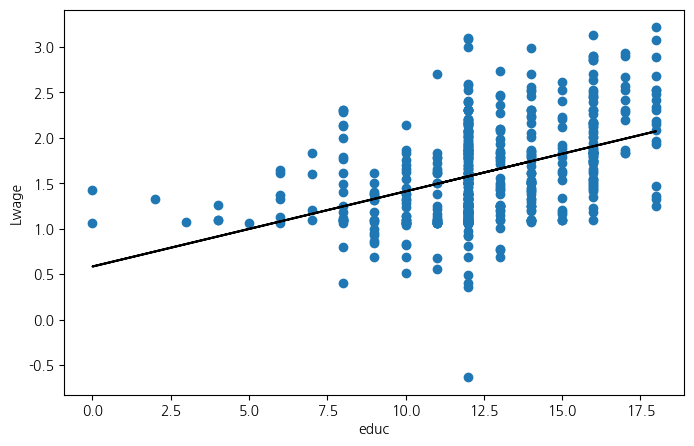

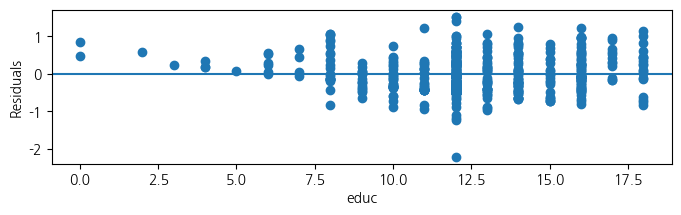

In [26]:
# 실제 데이터 값과 회귀추정식에 의한 Fitted된 값 그래프로 그리기
plt.figure(figsize =(8, 5))
plt.scatter('educ', 'Lwage', data=wage1)
plt.plot('educ', 'Lwage_fitted', data=wage1, color='black', linestyle='-')
plt.ylabel('Lwage')
plt.xlabel('educ')

# 잔차의 도표 그리기 
plt.figure(figsize =(8, 2))
plt.scatter('educ', 'residuals', data=wage1)
plt.ylabel('Residuals')
plt.xlabel('educ')
plt.axhline(y=0, linestyle='-')

In [27]:
# 탄력성 추정 회귀모형
wage1 = woo.dataWoo('wage1')

wage1['Lwage'] = np.log(wage1['wage'])
wage1['Leduc'] = np.log(wage1['educ'])

wage1.replace(-np.inf, np.nan, inplace=True)
wage1.dropna(inplace=True)

reg = smf.ols(formula='Lwage ~ Leduc', data=wage1)
results =reg.fit()

print(results.summary().tables[1])
display(results.summary())

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4447      0.218     -2.041      0.042      -0.873      -0.017
Leduc          0.8252      0.086      9.546      0.000       0.655       0.995


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Lwage   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     91.12
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           5.19e-20
Time:                        16:53:32   Log-Likelihood:                -370.08
No. Observations:                 524   AIC:                             744.2
Df Residuals:                     522   BIC:                             752.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4447      0.218     -2.041      0.042      -0.873      -0.017
Leduc          0.8252      0.086      9.546      0.000       0.655       0.995
==============================================================================
Omnibus:                       11.725   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.046
Skew:                           0.287   Prob(JB):                      0.00147
Kurtosis:                       3.517   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
wage1['Lwage_fitted'] = results.fittedvalues
wage1['residuals'] = results.resid

print(wage1.describe().T)

              count          mean         std       min        25%  \
wage          524.0  5.905134e+00    3.697024  0.530000   3.330000   
educ          524.0  1.261069e+01    2.662889  2.000000  12.000000   
exper         524.0  1.695992e+01   13.552261  1.000000   5.000000   
tenure        524.0  5.104962e+00    7.231653  0.000000   0.000000   
nonwhite      524.0  1.030534e-01    0.304319  0.000000   0.000000   
female        524.0  4.770992e-01    0.499953  0.000000   0.000000   
married       524.0  6.087786e-01    0.488490  0.000000   0.000000   
numdep        524.0  1.043893e+00    1.262786  0.000000   0.000000   
smsa          524.0  7.251908e-01    0.446845  0.000000   0.000000   
northcen      524.0  2.519084e-01    0.434524  0.000000   0.000000   
south         524.0  3.549618e-01    0.478959  0.000000   0.000000   
west          524.0  1.679389e-01    0.374169  0.000000   0.000000   
construc      524.0  4.580153e-02    0.209254  0.000000   0.000000   
ndurman       524.0 

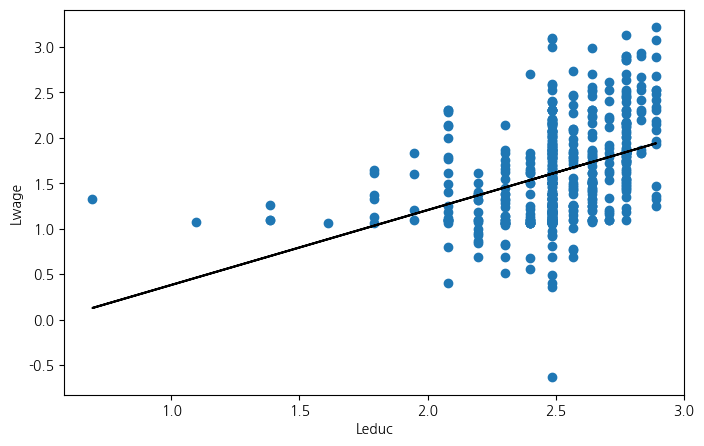

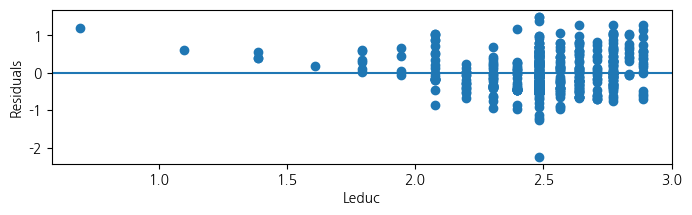

In [29]:
# 실제 데이터 값과 회귀추정식에 의한 Fitted된 값 그래프로 그리기
plt.figure(figsize =(8, 5))
plt.scatter('Leduc', 'Lwage', data=wage1)
plt.plot('Leduc', 'Lwage_fitted', data=wage1, color='black', linestyle='-')
plt.ylabel('Lwage')
plt.xlabel('Leduc')

# 잔차의 도표 그리기 
plt.figure(figsize =(8, 2))
plt.scatter('Leduc', 'residuals', data=wage1)
plt.ylabel('Residuals')
plt.xlabel('Leduc')
plt.axhline(y=0, linestyle='-')

In [30]:
#!pip show pandas
!pip install --upgrade pandas

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     2845.
Date:                Mon, 18 Aug 2025   Prob (F-statistic):          1.89e-294
Time:                        16:53:37   Log-Likelihood:                -725.74
No. Observations:                1000   AIC:                             1455.
Df Residuals:                     998   BIC:                             1465.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9891      0.034     88.975      0.0

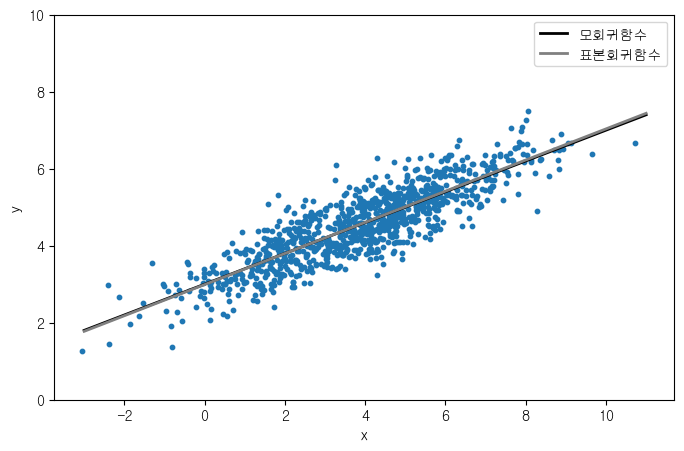

In [31]:
# ##########################################
# 회귀모형 몬테칼로 시뮬레이션(1 sample) ###
# ##########################################

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

# 한글 폰트 사용
import matplotlib
from matplotlib import font_manager, rc
font_location='C:/Windows/Fonts/NGULIM.ttf'
font_name =font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# set the random seed:
np.random.seed(123456)

# set sample size:
n = 1000

# set true parameters (betas and sd of u):
beta0 = 3
beta1 = 0.4

# draw a sample of size n:
x = stats.norm.rvs(4, 2, size=n)
u = stats.norm.rvs(0, 0.5, size=n)
y = beta0 + beta1 * x + u
df = pd.DataFrame({'y': y, 'x': x})

# OLS 추정치
reg = smf.ols(formula='y ~ x', data=df)
results = reg.fit()
b = results.params
print(results.summary())

# 그래프 그리기
x_range = np.linspace(-3, 11, num=140)
plt.figure(figsize =(8, 5))
plt.ylim([0, 10])
plt.scatter(x, y, s=10)
plt.plot(x_range, beta0 + beta1 * x_range, color='black',
         linestyle='-', linewidth=2, label='모회귀함수')
plt.plot(x_range, b[0] + b[1] * x_range, color='grey',
         linestyle='-', linewidth=2, label='표본회귀함수')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

b0_mean: 2.999409235653556

b1_mean: 0.4000538341107627

b0_var: 0.0011157235254103798

b1_var: 5.679925795422033e-05



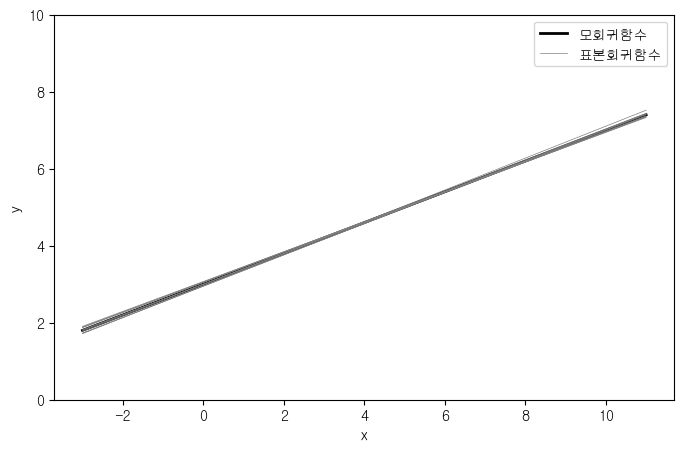

In [32]:
# ###############################################
# 회귀모형 몬테칼로 시뮬레이션(복수의 sample) ###
# ###############################################

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

# 시드값 부여
np.random.seed(123456)

# 표본수와 반복횟수
n = 1000
r = 10000

# 베타값과 그 표준편차
beta0 = 3
beta1 = 0.4

# b값 초기화
b0 = np.empty(r)
b1 = np.empty(r)

# x값은 고정(fixed)반영하기 위해 for문 바깥에 위치시킴
x = stats.norm.rvs(4, 2, size=n)

# r번 반복 실혐
for i in range(r):
    # Case 1): 오차항은 동분산, x와 상관되지 않음
    u = stats.norm.rvs(0, 0.5, size=n)
#    # Case 2): 오차항은 x와 상관
#    u_mean = np.array((x-4)/2)
#    u = stats.norm.rvs(u_mean, 0.5, size=n)
#    # Case 3): 오차항은 이분산 
#    u_var = np.array(4/np.exp(2.5)*np.exp(x))
#    u = stats.norm.rvs(0, np.sqrt(u_var), size=n)
    
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({'y': y, 'x': x})

    reg = smf.ols(formula='y ~ x', data=df)
    results = reg.fit()
    b0[i] = results.params['Intercept']
    b1[i] = results.params['x']

# b1, b2추정치의 평균
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print(f'b0_mean: {b0_mean}\n')
print(f'b1_mean: {b1_mean}\n')

# b1, b2추정치의 분산
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f'b0_var: {b0_var}\n')
print(f'b1_var: {b1_var}\n')

# 그래프 그리기
plt.figure(figsize =(8, 5))
x_range = np.linspace(-3, 11, num=140)
plt.ylim([0, 10])

# 모회귀방정식 
plt.plot(x_range, beta0 + beta1 * x_range, color='black',
         linestyle='-', linewidth=2, label='모회귀함수')

# 표본회귀방정식(10000개 표본회귀 방정식중 첫번째)
plt.plot(x_range, b0[0] + b1[0] * x_range, color='grey',
         linestyle='-', linewidth=0.5, label='표본회귀함수')

# 반복회수별 표본회귀선
for i in range(1, 10):
    plt.plot(x_range, b0[i] + b1[i] * x_range, color='grey',
             linestyle='-', linewidth=0.5)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

b0_mean: 1.6660759023202227

b1_mean: 0.7333871674440963

b0_var: 0.0011157235254103796

b1_var: 5.679925795422033e-05



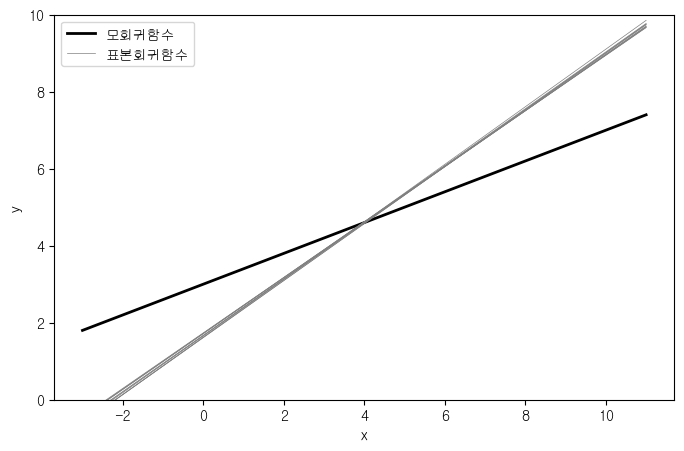

In [33]:
# ###############################################
# 회귀모형 몬테칼로 시뮬레이션(복수의 sample) ###
# ###############################################

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

# 시드값 부여
np.random.seed(123456)

# 표본수와 반복횟수
n = 1000
r = 10000

# 베타값과 그 표준편차
beta0 = 3
beta1 = 0.4

# b값 초기화
b0 = np.empty(r)
b1 = np.empty(r)

# x값은 고정(fixed)반영하기 위해 for문 바깥에 위치시킴
x = stats.norm.rvs(4, 2, size=n)

# r번 반복 실혐
for i in range(r):
#    # Case 1): 오차항은 동분산, x와 상관되지 않음
#    u = stats.norm.rvs(0, 0.5, size=n)
    # Case 2): 오차항은 x와 상관
    u_mean = np.array((x-4)/3)
    u = stats.norm.rvs(u_mean, 0.5, size=n)
#    # Case 3): 오차항은 이분산 
#    u_var = np.array(4/np.exp(2.5)*np.exp(x))
#    u = stats.norm.rvs(0, np.sqrt(u_var), size=n)
    
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({'y': y, 'x': x})

    reg = smf.ols(formula='y ~ x', data=df)
    results = reg.fit()
    b0[i] = results.params['Intercept']
    b1[i] = results.params['x']

# b1, b2추정치의 평균
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print(f'b0_mean: {b0_mean}\n')
print(f'b1_mean: {b1_mean}\n')

# b1, b2추정치의 분산
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f'b0_var: {b0_var}\n')
print(f'b1_var: {b1_var}\n')

# 그래프 그리기
plt.figure(figsize =(8, 5))
x_range = np.linspace(-3, 11, num=140)
plt.ylim([0, 10])

# 모회귀방정식 
plt.plot(x_range, beta0 + beta1 * x_range, color='black',
         linestyle='-', linewidth=2, label='모회귀함수')

# 표본회귀방정식(10000개 표본회귀 방정식중 첫번째)
plt.plot(x_range, b0[0] + b1[0] * x_range, color='grey',
         linestyle='-', linewidth=0.5, label='표본회귀함수')

# 반복회수별 표본회귀선
for i in range(1, 10):
    plt.plot(x_range, b0[i] + b1[i] * x_range, color='grey',
             linestyle='-', linewidth=0.5)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

b0_mean: 2.9981622780378596

b1_mean: 0.40026410518113875

b0_var: 0.1393366168825143

b1_var: 0.015395192870880722



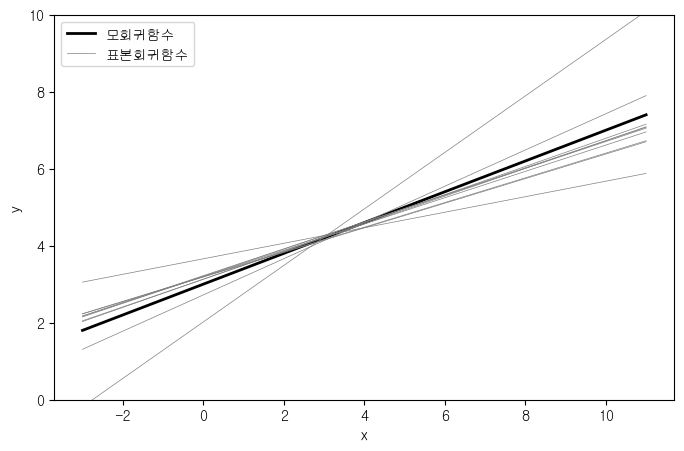

In [34]:
# ###############################################
# 회귀모형 몬테칼로 시뮬레이션(복수의 sample) ###
# ###############################################

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

# 시드값 부여
np.random.seed(123456)

# 표본수와 반복횟수
n = 1000
r = 10000

# 베타값과 그 표준편차
beta0 = 3
beta1 = 0.4

# b값 초기화
b0 = np.empty(r)
b1 = np.empty(r)

# x값은 고정(fixed)반영하기 위해 for문 바깥에 위치시킴
x = stats.norm.rvs(4, 2, size=n)

# r번 반복 실혐
for i in range(r):
#    # Case 1): 오차항은 동분산, x와 상관되지 않음
#    u = stats.norm.rvs(0, 0.5, size=n)
#    # Case 2): 오차항은 x와 상관
#    u_mean = np.array((x-4)/3)
#    u = stats.norm.rvs(u_mean, 0.5, size=n)
    # Case 3): 오차항은 이분산 
    u_var = np.array(4/np.exp(4.5)*np.exp(x))
    u = stats.norm.rvs(0, np.sqrt(u_var), size=n)
    
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({'y': y, 'x': x})

    reg = smf.ols(formula='y ~ x', data=df)
    results = reg.fit()
    b0[i] = results.params['Intercept']
    b1[i] = results.params['x']

# b1, b2추정치의 평균
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print(f'b0_mean: {b0_mean}\n')
print(f'b1_mean: {b1_mean}\n')

# b1, b2추정치의 분산
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f'b0_var: {b0_var}\n')
print(f'b1_var: {b1_var}\n')

# 그래프 그리기
plt.figure(figsize =(8, 5))
x_range = np.linspace(-3, 11, num=140)
plt.ylim([0, 10])

# 모회귀방정식 
plt.plot(x_range, beta0 + beta1 * x_range, color='black',
         linestyle='-', linewidth=2, label='모회귀함수')

# 표본회귀방정식(10000개 표본회귀 방정식중 첫번째)
plt.plot(x_range, b0[0] + b1[0] * x_range, color='grey',
         linestyle='-', linewidth=0.5, label='표본회귀함수')

# 반복회수별 표본회귀선
for i in range(1, 10):
    plt.plot(x_range, b0[i] + b1[i] * x_range, color='grey',
             linestyle='-', linewidth=0.5)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()